#Task 4 - Linear model, Polynomial model, Neural Network model

## Import of libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures

## Creation of sets (train - test)

In [ ]:
# Generate data as the directive says
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# Split data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)


## Linear model

In [ ]:
# Linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(x_test)

# Mean Squared Error in order to see how the model behaves, performance speaking
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')


Linear Regression MSE: 0.006041384789100588


## Polynomial regression model

In [ ]:
# Polynomial regression model (degree 2)
polyn = PolynomialFeatures(degree=2)
x_train_polyn = polyn.fit_transform(x_train)
x_test_polyn = polyn.transform(x_test)

polyn_model = LinearRegression()
polyn_model.fit(x_train_polyn, y_train)

# Predictions
y_pred_polyn = polyn_model.predict(x_test_polyn)

# Calculate MSE for polynomial model
mse_polyn = mean_squared_error(y_test, y_pred_polyn)
print(f'Polynomial Regression MSE: {mse_polyn}')


Polynomial Regression MSE: 0.0005714988625444271


## Neural network model

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(6, input_dim=1, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
nn_model.fit(x_train, y_train, epochs=1000, verbose=1)

# Predictions using the wrapped prediction function
y_pred_nn = nn_model(x_test)

# Calculate MSE for the neural network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network MSE: {mse_nn}')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0366
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297  
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0302  
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238  
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0261 
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0293
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213  
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205  
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143  
Epoch 13/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160  
Epoch 14/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 
Epoch 15/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

## Plot of results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


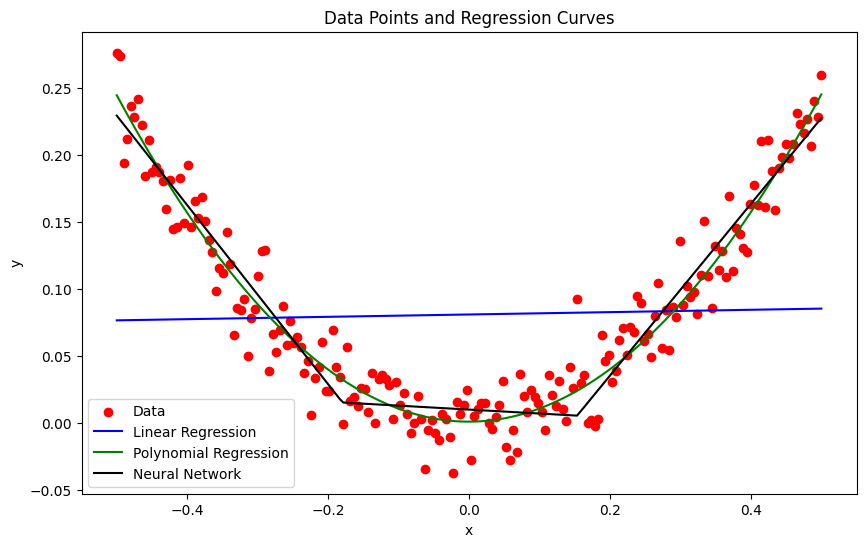

In [ ]:
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(x_data, y_data, color='red', label='Data')

#Linear model
y_pred_linear_full = linear_model.predict(x_data)
plt.plot(x_data, y_pred_linear_full, label='Linear Regression', color='blue')

# Polynomial regression curve
x_data_polyn = polyn.transform(x_data)
y_pred_polyn_full = polyn_model.predict(x_data_polyn)
plt.plot(x_data, y_pred_polyn_full, label='Polynomial Regression', color='green')

#even if not requested i decided to print the NN result.
#Neural Network --> note that we have not trained enough the neural network, we need more data and more layers to make it perform better. in this way it is possible to see that it performs almost like a polynomial
y_pred_nn_full = nn_model.predict(x_data)
plt.plot(x_data, y_pred_nn_full, label='Neural Network', color='black')

plt.title('Data Points and Regression Curves')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
